In [8]:
import scipy as sc
import numpy as np
from scipy import linalg as LS
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math
import os
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import random

In [12]:
#plt.close()
 
N = 1000 #effectif de la population
s0 = N   #nombre de susceptible initial
i0 = 1   #nombre d'infectés initial
r0 = 0   #nombre de guéris ou morts initial

beta = 10  #coefficient de transmission
gamma = 1  #coefficient de "guérison"
coef_diff = [0,0,0]     #coefficient de diffusion (respectivement de s,i et r)

dt = .01
T = 10   #durée de la simulation
Nt = int(T/dt)  #nombre d'itération

dx = .01
L=1
Nx=int(L/dx)

#############répartition initiale de SIR############
u = np.zeros(3*Nx)
for x in range(Nx):
    u[x] = N*np.exp(-0.01*(x-Nx/2)**2)  #répartition des susceptibles
    u[x+Nx] = 10.*random.random()   #répartition des infectés
    u[x+2*Nx] = 0    #répartition des guéris/morts
    
#############Construction des matrices##############
B = -2*np.eye(Nx)
for i in range(Nx-1) : 
    B[i,i+1] = 1
    B[i+1,i] = 1
    
B[0,Nx-1]=1
B[Nx-1,0]=1

A = np.zeros((3*Nx,3*Nx))
D = np.zeros((3*Nx,3*Nx))

for k in range(3) : 
    A[k*Nx:(k+1)*Nx,k*Nx:(k+1)*Nx]=B
    D[k*Nx:(k+1)*Nx,k*Nx:(k+1)*Nx]=coef_diff[k]*np.eye(Nx)

A=(1/dx**2)*A   #matrice laplacien
Md=D.dot(A)

Mi = np.linalg.inv(np.eye(3*Nx)-dt*Md)  #pour implicite

#############Définition de la source##############
def f(uv):
    tab=np.zeros(3*Nx)
    for x in range(Nx) : 
        tab[x] = -beta*uv[x]*uv[x+Nx]/N
        tab[x+Nx] = beta*uv[x]*uv[x+Nx]/N -gamma*uv[x+Nx]
        tab[x+2*Nx]= gamma*uv[x+Nx]
    return tab

#Le tableau M va contenir toutes les itérations en temps du vecteur u
M = np.zeros((3*Nx,Nt)); 

#Initialisation 
M[:,0] = u; 

#############Schéma numérique##############
for t in range(1,Nt):
    #u=u + dt*(Md.dot(u)+f(u))    #explicite
    u = Mi.dot(u+dt*f(u))       #implicite (plus stable et plus "continu" que explicite)
    M[:,t]=u
    

<IPython.core.display.Javascript object>


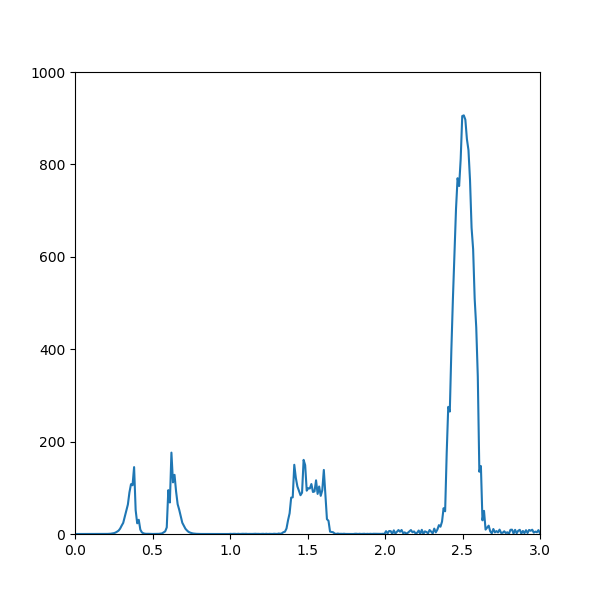

In [13]:
#############Plotting##############

esp = np.linspace(0,3*L,3*Nx)
fig, ax1 = plt.subplots(1, figsize = (6,6))
plotu,  = ax1.plot(esp,M[:,0])

def animate(p):
    f = M[:,p]
    plotu.set_ydata(f)    
    
def init(): 
    ax1.set_xlim(0,3)
    ax1.set_ylim(0.,N)
    return plotu,

step = 1
steps = np.arange(1,Nt,step)
ani = FuncAnimation(fig, animate,steps, init_func = init, interval = 10, blit = True)

In [178]:
plt.close()